In [4]:
# Bk4_Ch6_01.py

import numpy as np

A = np.array([[1, 2, 3, 0,  0],
              [4, 5, 6, 0,  0],
              [0, 0, 0, -1, 0],
              [0, 0 ,0, 0,  1]])

# NumPy array slicing

A_1_1 = A[0:2,0:3]

A_1_2 = A[0:2,3:]
# A_1_2 = A[0:2,-2:]
A_2_1 = A[2:,0:3]
# A_2_1 = A[-2:,0:3]
A_2_2 = A[2:,3:]
# A_2_2 = A[-2:,-2:]

# Assemble a matrix from nested lists of blocks

A_ = np.block([[A_1_1, A_1_2],
               [A_2_1, A_2_2]])

A

array([[ 1,  2,  3,  0,  0],
       [ 4,  5,  6,  0,  0],
       [ 0,  0,  0, -1,  0],
       [ 0,  0,  0,  0,  1]])

C:\Users\ghdong\AppData\Local\Temp\ipykernel_15248\3093744032.py:18: DeprecationWarning: This function is deprecated. Please call randint(0, 40 + 1) instead
  A = np.random.random_integers(0,40,size=(6,4))
C:\Users\ghdong\AppData\Local\Temp\ipykernel_15248\3093744032.py:22: DeprecationWarning: This function is deprecated. Please call randint(0, 40 + 1) instead
  B = np.random.random_integers(0,40,size=(4,3))


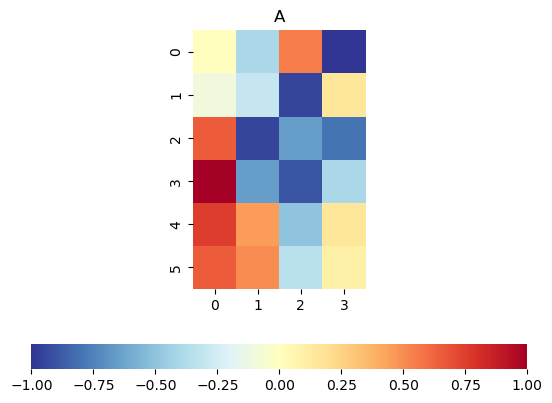

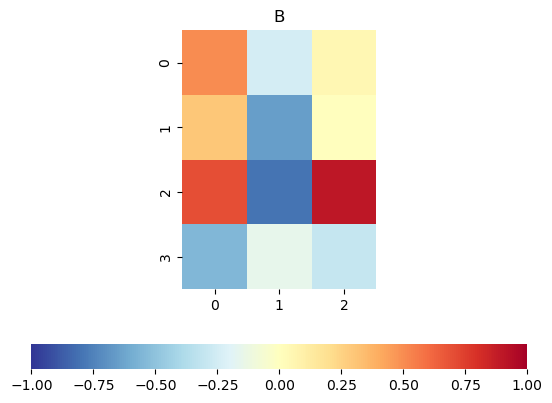

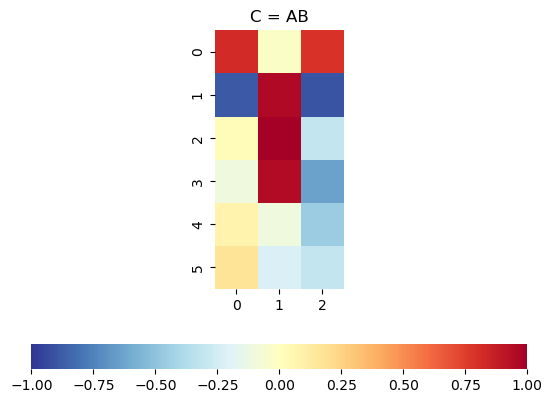

In [6]:
# Bk4_Ch6_02.py

import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

def plot_heatmap(x,title):

    fig, ax = plt.subplots()
    ax = sns.heatmap(x,
                     cmap='RdYlBu_r',
                     cbar_kws={"orientation": "horizontal"}, vmin=-1, vmax=1)
    ax.set_aspect("equal")
    plt.title(title)

# Generate matrices A and B
# np.random.randint 用于生成随机整数矩阵
A = np.random.random_integers(0,40,size=(6,4))
# 归一化
A = A/20 - 1

B = np.random.random_integers(0,40,size=(4,3))
B = B/20 - 1

# visualize matrix A and B
plot_heatmap(A,'A')

plot_heatmap(B,'B')

# visualize A@B
C = A@B
plot_heatmap(C,'C = AB')


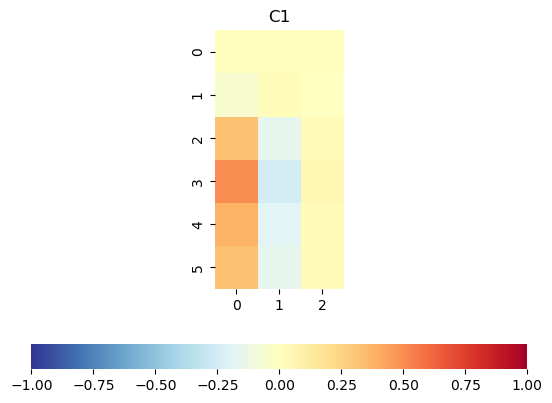

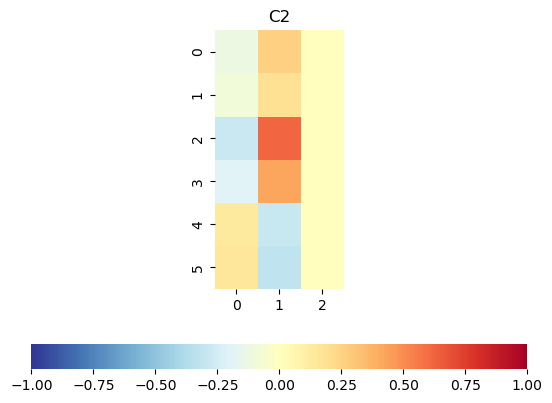

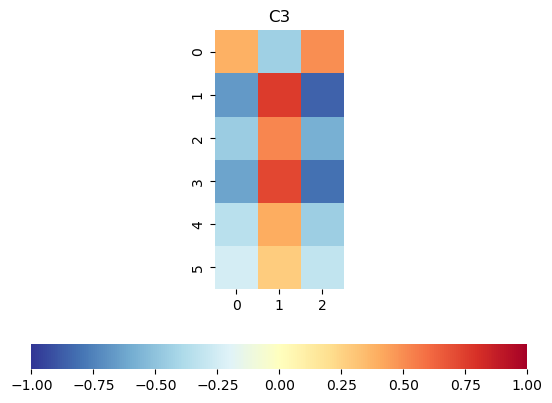

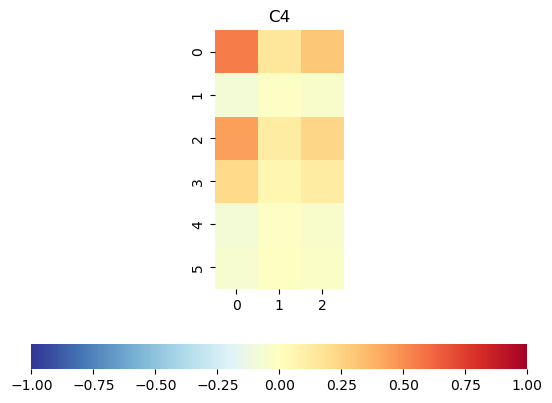

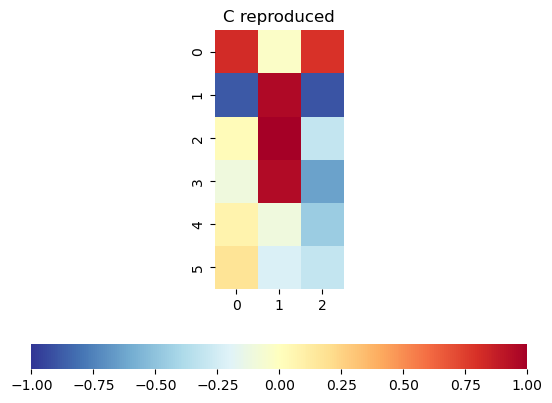

In [7]:
C_rep = np.zeros_like(C)

# reproduce C

for i in np.arange(4):
    C_i = A[:,[i]]@B[[i],:];
    title = 'C' + str(i + 1)
    plot_heatmap(C_i,title)
    
    C_rep = C_rep + C_i

# Visualize reproduced C
plot_heatmap(C_rep,'C reproduced')


[[-0.5   0.6   0.5  -0.6 ]
 [ 0.8  -0.3  -0.8   0.3 ]
 [ 0.35 -0.42 -0.2   0.24]
 [-0.56  0.21  0.32 -0.12]]


Text(0.5, 1.0, 'C')

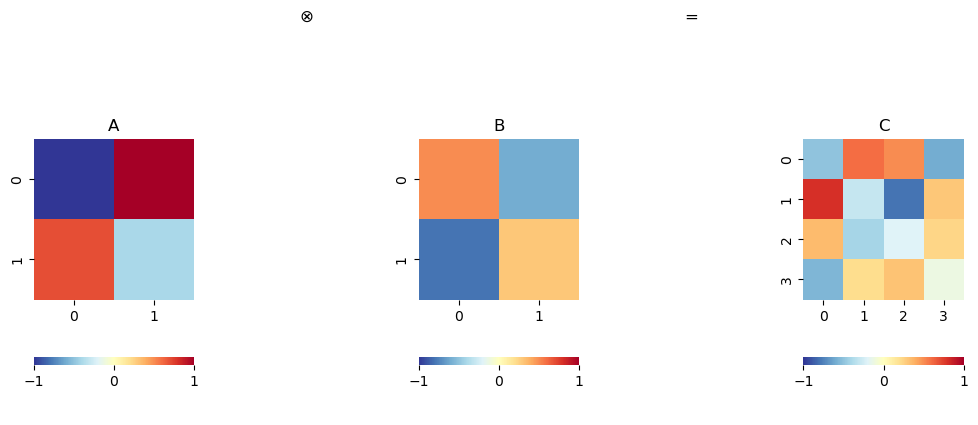

In [10]:
# Bk4_Ch6_03.py

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

A = np.array([[-1,  1],
              [0.7, -0.4]])

B = np.array([[0.5, -0.6],
             [-0.8, 0.3]])

# np.kron 函数被用于计算两个矩阵 A 和 B 的 Kronecker 乘积
A_kron_B = np.kron(A, B)
print(A_kron_B)

fig, axs = plt.subplots(1, 5, figsize=(12, 5))

# 设置坐标轴
plt.sca(axs[0])
ax = sns.heatmap(A,cmap='RdYlBu_r',vmax = 1,vmin = -1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('A')

plt.sca(axs[1])
plt.title('$\otimes$')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(B,cmap='RdYlBu_r',vmax = 1,vmin = -1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('B')

plt.sca(axs[3])
plt.title('=')
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(A_kron_B,cmap='RdYlBu_r',vmax = 1,vmin = -1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('C')